In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using PhasorNetworks
using Plots
using Random: Xoshiro, AbstractRNG

In [3]:
include("resonator.jl")

resonate (generic function with 1 method)

In [4]:
n_cb = 20
n_vsa = 1024

1024

In [5]:
rng0 = Xoshiro(42)

Xoshiro(0xa379de7eeeb2a4e8, 0x953dccb6b532b3af, 0xf597b8ff8cfd652a, 0xccd7337c571680d1, 0xc90c4a0730db3f7e)

In [6]:
X_cb = random_symbols((n_cb, n_vsa), rng0)
Y_cb = random_symbols((n_cb, n_vsa), rng0)
Z_cb = random_symbols((n_cb, n_vsa), rng0);

In [7]:
fac, sym = generate_composition(rng0, X_cb, Y_cb, Z_cb)

([-0.0910341739654541 0.18797945976257324 … 0.06673598289489746 0.2970832586288452; -0.3065168857574463 -0.016473770141601562 … -0.09602761268615723 -0.8534413576126099; -0.1334984302520752 0.23561692237854004 … -0.2857959270477295 0.26616859436035156], [-0.5310494899749756 0.4071226119995117 … -0.31508755683898926 -0.2901895046234131])

In [8]:
fac

3×1024 Matrix{Float64}:
 -0.0910342   0.187979    0.187316   …   0.672841   0.066736    0.297083
 -0.306517   -0.0164738   0.0870019     -0.92451   -0.0960276  -0.853441
 -0.133498    0.235617   -0.430766       0.27169   -0.285796    0.266169

In [9]:
sym

1×1024 Matrix{Float64}:
 -0.531049  0.407123  -0.156448  0.278131  …  0.0200207  -0.315088  -0.29019

In [10]:
chk1 = similarity_outer(sym, X_cb, dims=1);

In [11]:
chk2 = similarity_outer(sym, Y_cb, dims=1);

In [12]:
chk3 = similarity_outer(sym, Z_cb, dims=1);

In [13]:
chk3

1×1×20 Array{Float64, 3}:
[:, :, 1] =
 -0.018858982033482827

[:, :, 2] =
 0.037904002781634326

[:, :, 3] =
 0.0013569636489638508

;;; … 

[:, :, 18] =
 0.006233140288371793

[:, :, 19] =
 0.022393293394837095

[:, :, 20] =
 -0.019569353265347016

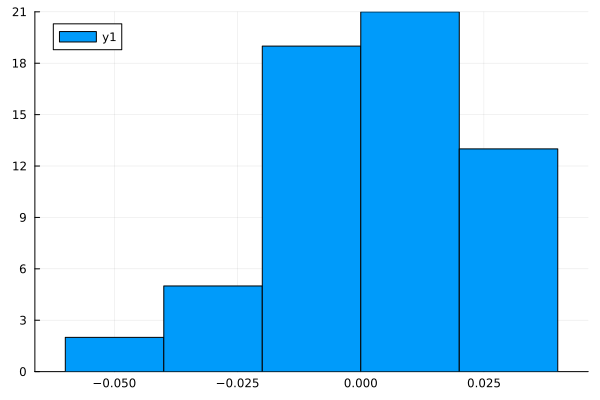

In [14]:
histogram(cat(chk1, chk2, chk3, dims=1)|> vec)

In [15]:
fac |> size

(3, 1024)

In [16]:
xx = v_unbind(sym, v_bind(fac[3:3,:],fac[2:2,:]))

1×1024 Matrix{Float64}:
 -0.0910342  0.187979  0.187316  0.648125  …  0.672841  0.066736  0.297083

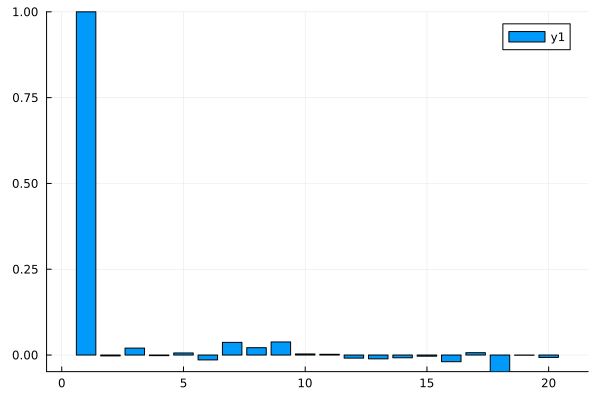

In [17]:
bar(similarity_outer(xx, X_cb, dims=1) |> vec)

In [18]:
yy = v_unbind(sym, v_bind(fac[1:1,:], fac[3:3,:]))

1×1024 Matrix{Float64}:
 -0.306517  -0.0164738  0.0870019  …  -0.92451  -0.0960276  -0.853441

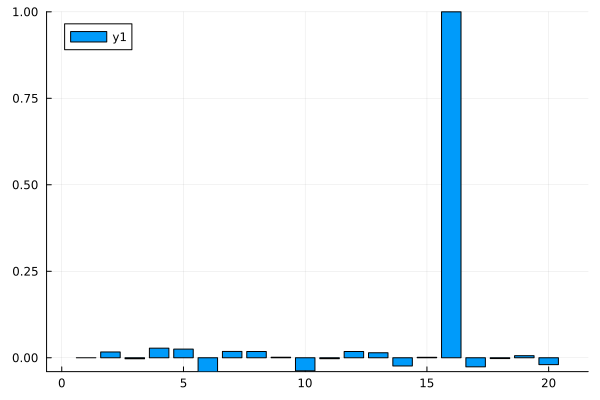

In [19]:
bar(similarity_outer(yy, Y_cb, dims=1) |> vec)

In [22]:
zz = v_unbind(sym, v_bind(fac[1:1,:], fac[2:2,:]))

1×1024 Matrix{Float64}:
 -0.133498  0.235617  -0.430766  0.381202  …  0.27169  -0.285796  0.266169

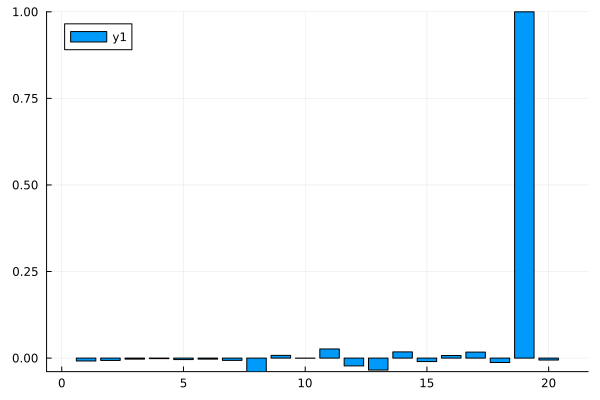

In [24]:
bar(similarity_outer(zz, Z_cb, dims=1) |> vec)

In [26]:
x_cb, y_cb, z_cb = initialize_guesses(X_cb, Y_cb, Z_cb)

3-element Vector{Matrix{Float64}}:
 [-0.3590450331537608 -0.12601368849529404 … -0.007139724235720468 0.29186573919248443]
 [0.755667336520337 0.8475005839653564 … 0.4821915168463748 -0.30048840957188777]
 [0.13805197132714905 -0.7830481773267493 … -0.2737929510652372 -0.4138172421881136]

In [31]:
xg = refine(sym, X_cb, cat(y_cb, z_cb, dims=1))

1×1024 Matrix{Float64}:
 -0.98263  -0.890354  0.408638  0.672757  …  0.192111  -0.922831  0.360543

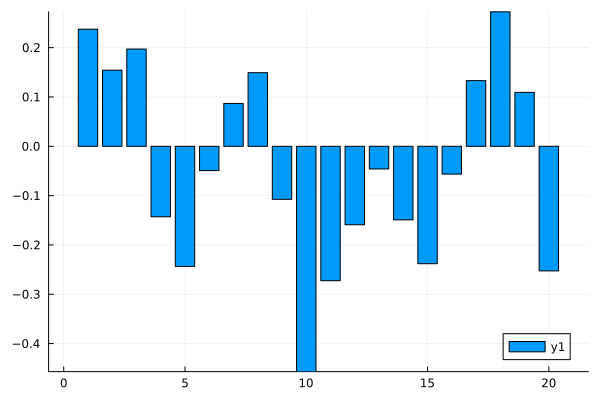

In [32]:
bar(similarity_outer(X_cb, xg, dims=1) |> vec)

In [33]:
g = resonate(sym, 10, X_cb, Y_cb, Z_cb)

11-element Vector{Matrix{Float64}}:
 [-0.3590450331537608 -0.12601368849529404 … -0.007139724235720468 0.29186573919248443; 0.755667336520337 0.8475005839653564 … 0.4821915168463748 -0.30048840957188777; 0.13805197132714905 -0.7830481773267493 … -0.2737929510652372 -0.4138172421881136]
 [-0.9826295227376924 -0.8903541786725081 … -0.9228312413955096 0.36054333551514367; 0.0031116464681766247 -0.31158909446151245 … 0.48165973464211337 0.6636200888667976; -0.42090375421431253 0.3060006904449608 … 0.9645902573282245 0.6414103632494449]
 [0.14729977708548883 0.2608104945211951 … 0.10054447568598962 0.3981100135469332; -0.240770602297113 -0.3723977707089358 … -0.18827088038253073 -0.9536062894920184; -0.7179836441451783 0.0486818503152502 … -0.3610034919388611 0.19925264671223414]
 [-0.1743026711168067 0.19762778394447933 … 0.041537301473127675 0.26228507897797176; -0.29747381336580303 -0.0166225766217283 … -0.05554630911304247 -0.8487633527486862; -0.10596974077711406 0.29737711482446083 … 

In [34]:
xmapfn = x -> vec(similarity_outer(x[1:1,:], X_cb, dims=1))

#11 (generic function with 1 method)

In [35]:
ymapfn = x -> vec(similarity_outer(x[2:2,:], Y_cb, dims=1))

#13 (generic function with 1 method)

In [42]:
zmapfn = x -> vec(similarity_outer(x[3:3,:], Z_cb, dims=1))

#15 (generic function with 1 method)

In [36]:
xsims = cat(collect(map(xmapfn, g))..., dims=2);

In [37]:
ysims = cat(collect(map(ymapfn, g))..., dims=2);

In [43]:
zsims = cat(collect(map(zmapfn, g))..., dims=2);

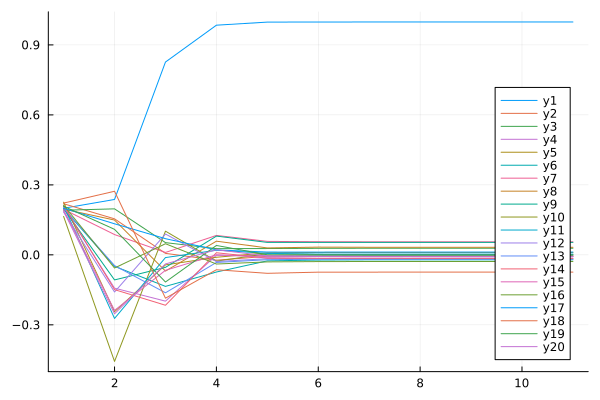

In [38]:
plot(xsims')

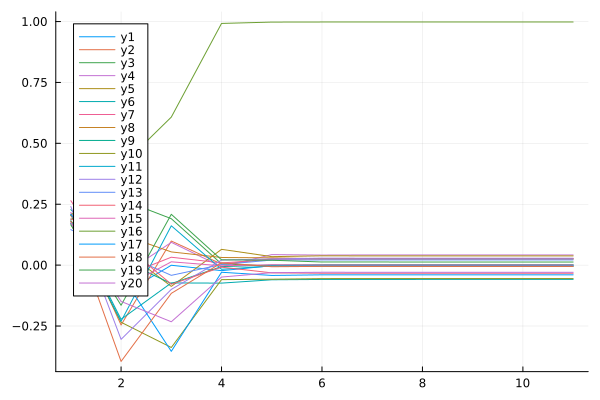

In [39]:
plot(ysims')

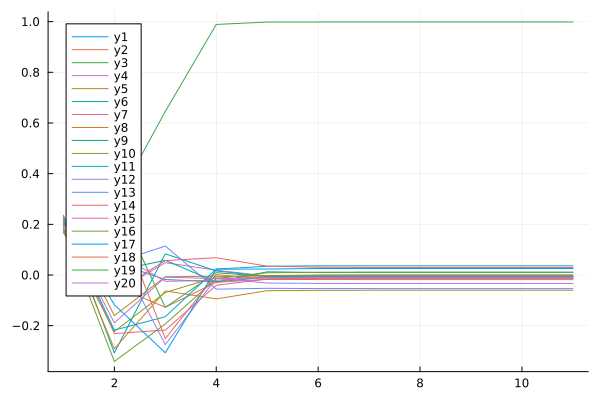

In [44]:
plot(zsims')

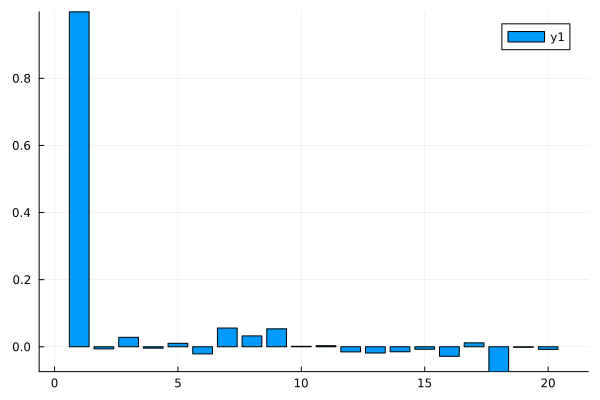

In [45]:
bar(similarity_outer(g[end][1:1,:], X_cb, dims=1) |> vec)

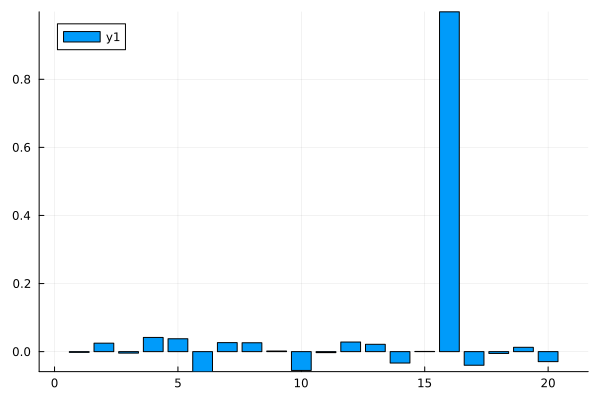

In [46]:
bar(similarity_outer(g[end][2:2,:], Y_cb, dims=1) |> vec)

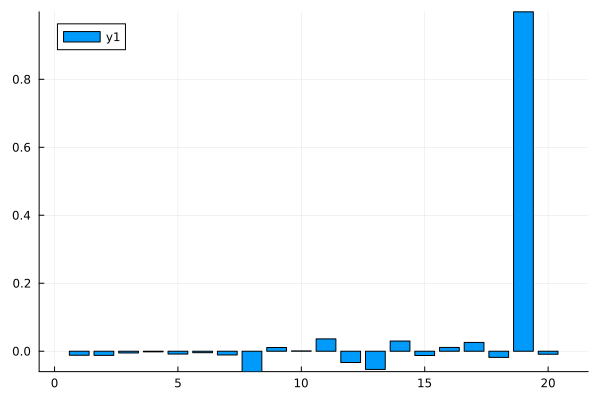

In [47]:
bar(similarity_outer(g[end][3:3,:], Z_cb, dims=1) |> vec)